### Late Dark Energy  
Diogo H F de Souza, Sep 5 2023 - Testing CAMBLateDE:  https://github.com/SBU-COSMOLIKE/CAMB  

In [2]:
# Importing libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os, sys
import camb

#Check which CAMB is installed. It should return CAMBLateDE
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.5.0 installed at /home/grads/data/Diogo/CAMBLateDE/camb


### Basic test: CAMBLateDE

In [3]:
latedeCosmology = camb.set_params(# Background
                            H0 = 70, ombh2=0.02238280, omch2=0.1201075, TCMB = 2.7255,
                            dark_energy_model = 'LateDE',
                            w0 = -0.9123, w1 = 0, model = 10,
                            # Neutrinos
                            omnuh2 = 0, num_nu_massless=3.044, num_nu_massive = 0,
                            nu_mass_degeneracies=[0], nu_mass_numbers = [0],
                            # Initial Power Spectrum
                            As = 2.100549e-09, ns = 0.9660499, 
                            YHe = 0.246, WantTransfer=True)

latedeResults = camb.get_results(latedeCosmology)
scales = np.logspace(-6, 0, 200)
rhode, w = latedeResults.get_dark_energy_rho_w(scales)
omegade = latedeResults.get_Omega('de', z = 1/scales - 1)

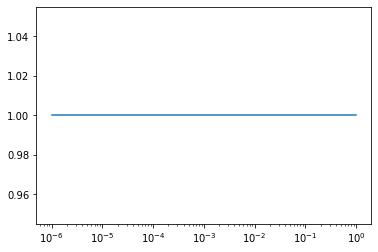

In [4]:
plt.semilogx(scales, rhode)